## Assignment

### Part I

#### Clean your data

+ Read in temp_data.txt
    + It won't be easy! You'll need to find a way to clean the data
    + Try opening the file in a text editor first
+ Read in temp_X.csv
+ Merge the X variable from temp_X with the data from temp_data
+ Note that we discussed this in class, but it's something you'll just need to practice on your own. 
+ You will struggle with this and it's ok
+ Check out the documentation for read_csv() in the pandas package


### Part II

#### Run a linear regression
+ Using X to predict temperature 
+ Interpret your coefficients!
+ What is one potential use for this linear regression equation? 
+ What does this linear regression mean? 
+ Is this a good model? Why or why not? 

    


In [2]:
import numpy as np
import pandas as pd

In [3]:
# Read in temp_data.txt
temp_config = { 
    'filepath': '../../DS-SF-32/lessons/lesson-6/temp_data.txt', 
    'separator': '\s+' ,
    'header': None,
    'names': ['Station ID', 'Series Number', 'Date', 'Temperature (C)', 'Uncertainty (C)', 'Observations', 'Time of Observation'],
    'skip_rows': 111
}

temps = pd.read_csv(temp_config['filepath'], skiprows=temp_config['skip_rows'], sep=temp_config['separator'], header=temp_config['header'], names=temp_config['names'])

temps.head()


,Station ID,Series Number,Date,Temperature (C),Uncertainty (C),Observations,Time of Observation
0,25398,1,1986.708,26.611,0.0507,30,24
1,25398,1,1986.875,27.593,0.0507,30,24
2,25398,1,1986.958,28.226,0.0499,31,24
3,25398,1,1987.042,27.581,0.0499,31,24
4,25398,1,1987.125,27.996,0.0525,28,24


In [4]:
# Read in temp_X.csv
xes = pd.read_csv('../../DS-SF-32/lessons/lesson-6/temp_X.csv', index_col=0)

xes.head()

,Station_ID,Series_Number,Date,X
0,25398,1,1986.708,79.8998
1,25398,1,1986.875,81.6674
2,25398,1,1986.958,82.8068
3,25398,1,1987.042,81.6458
4,25398,1,1987.125,82.3928


In [41]:
xes = xes.rename(columns={"Series_Number": "Series Number", "Station_ID": "Station ID"})
xes.head()

,Station ID,Series Number,Date,X
0,25398,1,1986.708,79.8998
1,25398,1,1986.875,81.6674
2,25398,1,1986.958,82.8068
3,25398,1,1987.042,81.6458
4,25398,1,1987.125,82.3928


In [53]:
# Merge the X variable from temp_X with the data from temp_data
temp_data = pd.merge(temps, xes, how='inner', on=['Date', 'Series Number', 'Station ID'], copy=True, sort=False)
temp_data.head()

,Station ID,Series Number,Date,Temperature (C),Uncertainty (C),Observations,Time of Observation,X
0,25398,1,1986.708,26.611,0.0507,30,24,79.8998
1,25398,1,1986.875,27.593,0.0507,30,24,81.6674
2,25398,1,1986.958,28.226,0.0499,31,24,82.8068
3,25398,1,1987.042,27.581,0.0499,31,24,81.6458
4,25398,1,1987.125,27.996,0.0525,28,24,82.3928


In [54]:
temp_data.shape

(141637, 8)

In [55]:
# Run a linear regression using X to predict temperature
from sklearn import linear_model, metrics

In [56]:
lm = linear_model.LinearRegression().fit(temp_data[['X']], temp_data['Temperature (C)'])
print lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [85]:
print "B1: %.2f" % lm.coef_
print "B0: %.2f" % lm.intercept_

B1: 0.56
B0: -17.78
r-squared: 0.31


In [86]:
# mean squared error
print("Mean squared error: %.2f"
      % np.mean((lm.predict(temp_data[['X']]) - temp_data['Temperature (C)']) ** 2))
# explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(temp_data[['X']], temp_data['Temperature (C)']))

Mean squared error: 0.00
Variance score: 1.00


In [87]:
lm.score(temp_data[['X']], temp_data['Temperature (C)'])

1.0

In [59]:
import seaborn as sns

In [60]:
temp_data.head(100)[['X', 'Temperature (C)']].corr(method='spearman')

,X,Temperature (C)
X,1.0,1.0
Temperature (C),1.0,1.0


In [61]:
import matplotlib.pyplot as plt

In [64]:
temp_data_x = temp_data.head(1000)[['X']]
temp_data_y = temp_data.head(1000)[['Temperature (C)']]

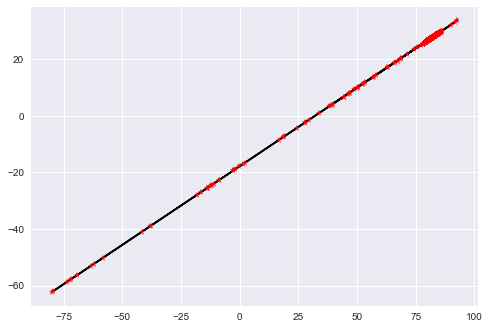

In [80]:
# create a matplotlib figure
plt.figure()
# show prediction line
plt.plot(temp_data_x, lm.predict(temp_data_x), color='black')
# generate a scatterplot inside the figure
plt.plot(temp_data_x, temp_data_y, '*', color='red')
# show the plot
plt.show()

### Interpret your coefficients!
X and Temperature (C) are perfectly correlated, based on this sample. 

### What is one potential use for this linear regression equation?
Given an X-reading, find the corresponding Temperature (C).

### What does this linear regression mean?
There is a strong correlation between X and Temperature (C).  X completely explains the variances in Temperature (C).

### Is this a good model? Why or why not?
This is a low variance model, though we've been told an R^2 of 1.0 should be suspicious. It is a good model for the relationship between X and Temperature (C). 